<a href="https://colab.research.google.com/github/Dorcass/Anomaly-detection-using-wavelet-scattering-network/blob/master/Essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy import signal
from google.colab import files

## The morlet wavelet function is a combination of a sine function and a gaussian
### sine wave

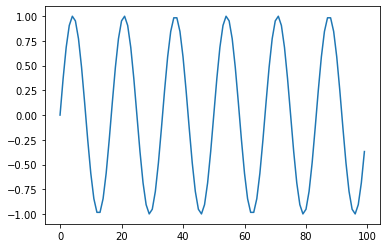

In [0]:
num = np.arange(100)
T = len(num)
sine = np.zeros(T)
f = 6  # the frequency of the signal
fs = 100  #sample rate
#t = np.arange(100)
for t in range(T):
    sine[t] = np.sin(2*np.pi*f*(t/fs))
plt.plot(sine)
plt.show()

### Gaussian distribution

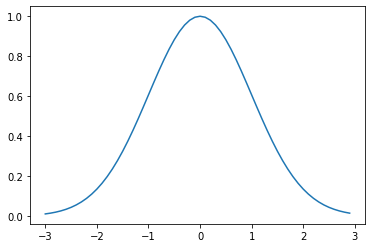

In [0]:
t =np.arange(-3,3,.1)
s=1
norm = np.exp(-.5*(t/s)**2)
plt.plot(t,norm)
plt.show()

Gaussian low pass filter
$\phi(t) = \dfrac{1}{\sqrt{2\pi s}} e^{-\dfrac{t^2}{2s^2}}$

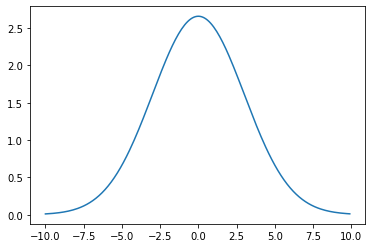

In [0]:
t =np.arange(-10,10,.1)
s=3
norm = (np.exp(-.5*(t/s)**2) / (np.sqrt(2*np.pi*s**2)))*20

plt.plot(t,norm)
plt.show()

## $\int \phi(t) dt  =  1$

In [0]:
import scipy.integrate
from numpy import exp
f= lambda x:np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
i = scipy.integrate.quad(f,-3,3)
print (i)

(0.9973002039367399, 1.1072256503105314e-14)


### standard morlet function $\psi(t) = e^{i\omega t} e^{-0.5t^2/\sigma^2}, \omega > 5$
###  Note that this simplified version can cause admissibility problems at low values of w.

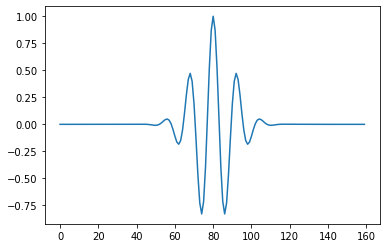

In [0]:
num = np.arange(-8,8,.1)
s = 1
f = 2
fs=2.5
sine = np.exp(1j*2*np.pi*f*(num/fs)) * np.exp((-.5*(num/s)**2))
plt.plot(sine.real)
plt.show()

### Complete morlet function $\psi(t) = \pi^{-0.25}(e^{i\omega t} - e^{-0.5\omega^2})e^{-0.5t^2/\sigma^2}$
### This version has a correction term to improve admissibility. For w greater than 5, the correction term is negligible.

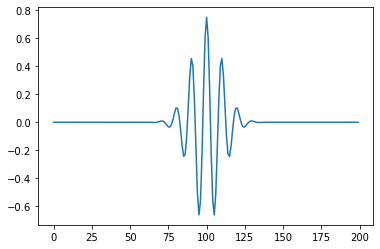

In [0]:
x = np.arange(-10,10,.1)
w=2*np.pi*2.5/2.5

new = np.pi**-0.25 * (np.exp(1j*w*x - np.exp(-0.5*(w**2))) * np.exp(-0.5*(x**2)))
plt.plot(new.real)
plt.show()

## $\int \psi(t) dt = 0$

In [0]:
import scipy.integrate
from numpy import exp
f= lambda x:np.pi**-0.25 * (np.exp(1j*5.026*x - np.exp(-0.5*(5.026**2))) * np.exp(-0.5*(x**2)))
i = scipy.integrate.quad(f,-5,5)
print (i)

(5.590150747514927e-06, 6.962444981053917e-09)


/usr/local/lib/python3.6/dist-packages/scipy/integrate/quadpack.py:453: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


 ### set of $\lambda_1$ scales 
 ### $\lambda_1 = \{ 2^{1 + \frac{j}{Q_1}}, j = 0,...,J_1 \times Q_1 - 1\}$

In [0]:
def scale1(J1,Q1):
    lambda1 = np.zeros(J1*Q1) #initialising 
    for j in range(J1*Q1):
        lambda1[j] += 2**(1+(j/Q1)) #set of scales for lambda1
    return(lambda1)


In [0]:
#viewing the output of the set of first scales
for i in scale1(5,8):
    print(i)


2.0
2.1810154653305154
2.378414230005442
2.5936791093020193
2.8284271247461903
3.0844216508158815
3.363585661014858
3.668016172818685
4.0
4.362030930661031
4.756828460010884
5.187358218604039
5.656854249492381
6.168843301631763
6.727171322029716
7.33603234563737
8.0
8.724061861322062
9.513656920021768
10.374716437208077
11.313708498984761
12.337686603263526
13.454342644059432
14.67206469127474
16.0
17.448123722644123
19.027313840043536
20.749432874416154
22.627416997969522
24.675373206527052
26.908685288118864
29.34412938254948
32.0
34.896247445288246
38.05462768008707
41.49886574883231
45.254833995939045
49.350746413054104
53.81737057623773
58.68825876509896


 ### set of $\lambda_2$ scales 
 ### $\lambda_2 = \{ 2^{1 + \frac{j}{Q_2}}, j = 0,...,J_2 \times Q_2 - 1\}$

In [0]:
def scale2(J2,Q2):
    lambda2 = np.zeros(J2*Q2) #initialising 
    for j in range(J2*Q2):
        lambda2[j] += 2**(1+(j/Q2)) #set of scales for lambda2
    return(lambda2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


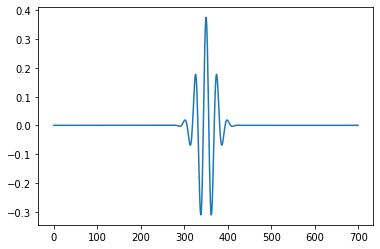

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


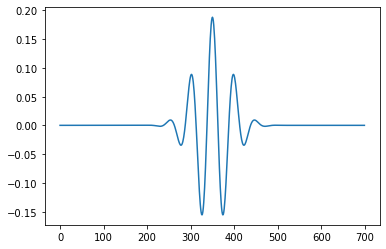

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


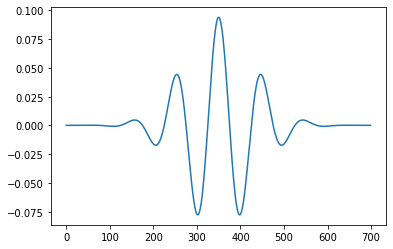

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


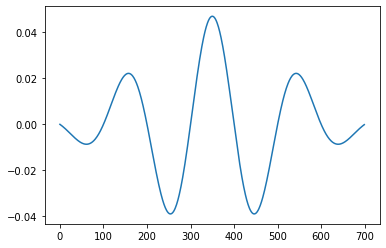

In [0]:
t = np.arange(-35,35,.3)
T = len(t)
mor = np.zeros(T)
w=2*np.pi*2/2.5

#viewing the output of the set of second scales
for i in scale2(4,1):
  for x in range(T):
    #wavelet filters for the various scales of lambda(2) 
    mor[x] = (np.pi**-0.25 * (np.exp(1j*w*(t[x]/i)) - np.exp(-0.5*(w**2))) * np.exp(-0.5*((t[x]/i)**2))/i)
                
  plt.plot(mor.real)
  plt.show()


### dilated wavelet filter  $\psi_{\lambda}(t) = \dfrac{1}{\lambda}\psi\Bigg(\dfrac{t}{\lambda}\Bigg)$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


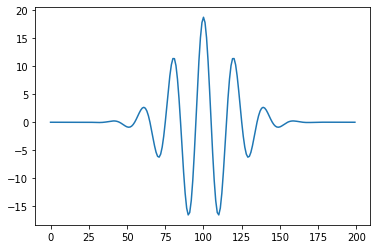

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


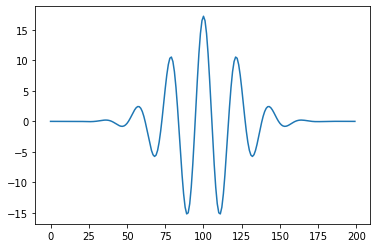

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


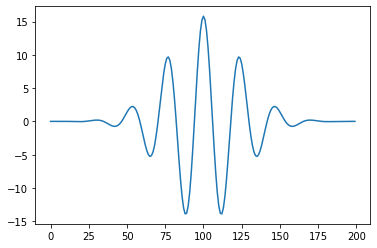

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


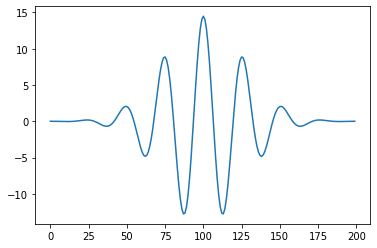

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


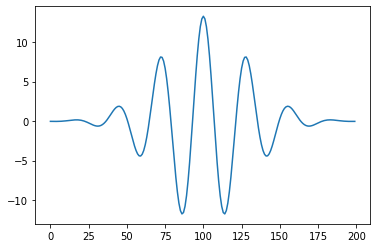

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


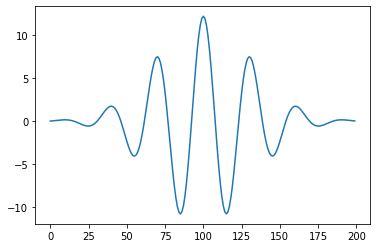

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


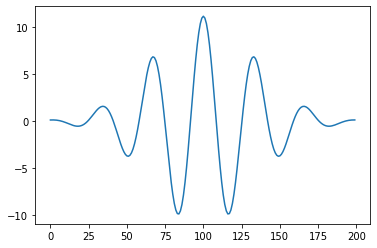

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


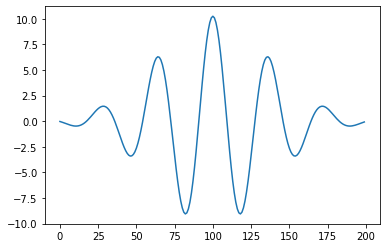

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


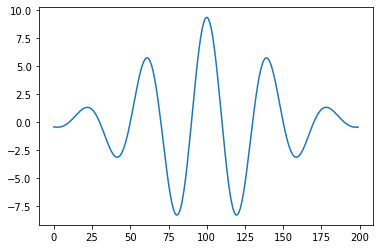

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


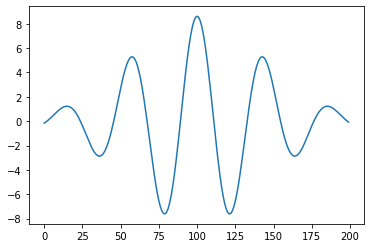

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


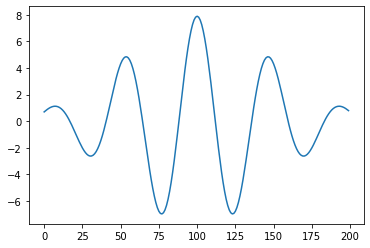

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


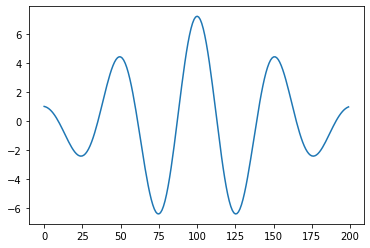

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


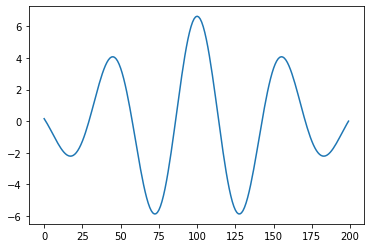

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


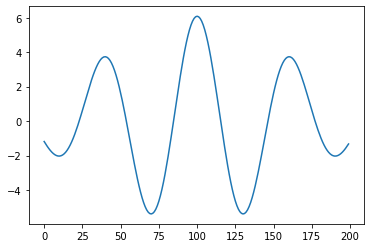

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


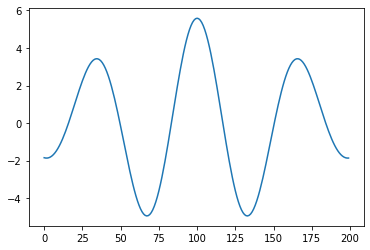

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


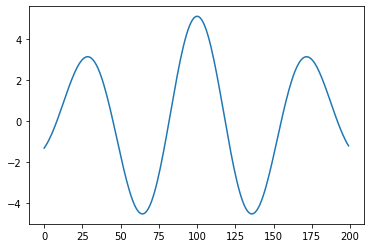

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


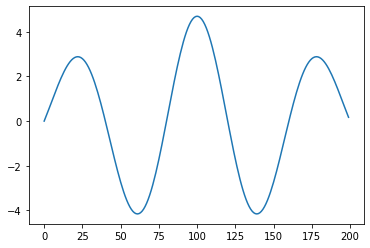

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


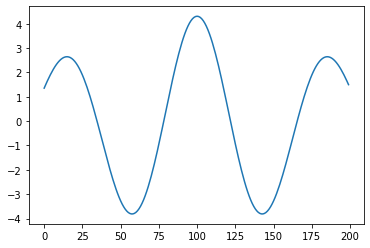

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


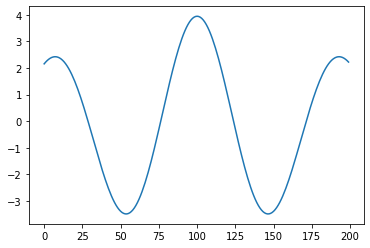

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


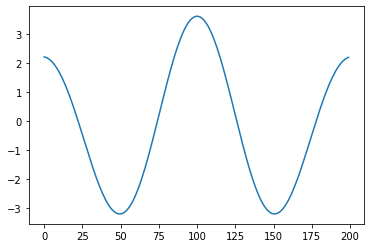

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


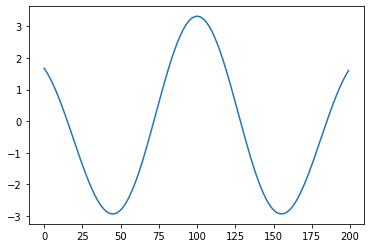

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


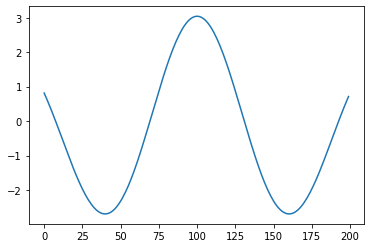

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


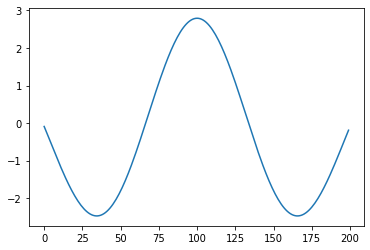

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


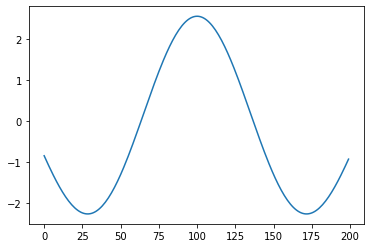

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


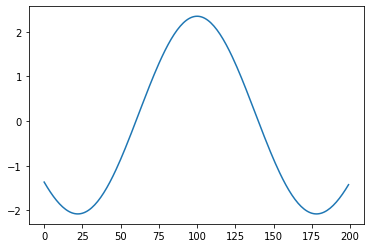

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


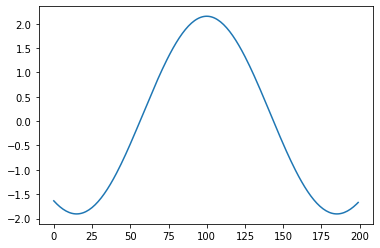

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


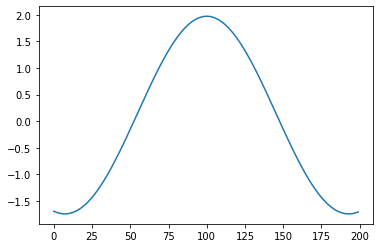

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


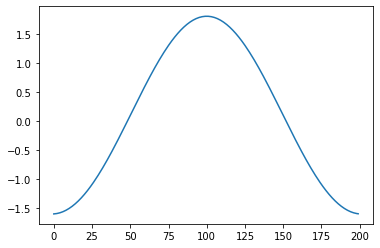

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


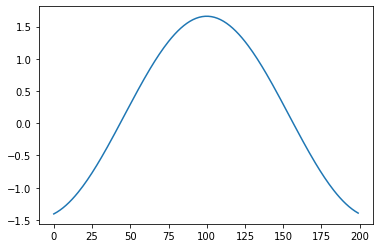

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


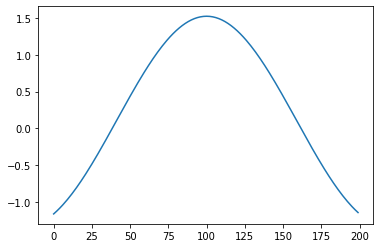

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


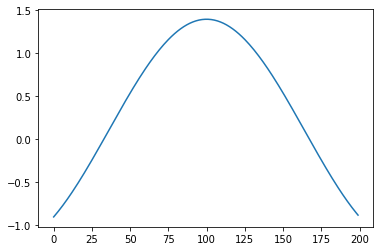

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


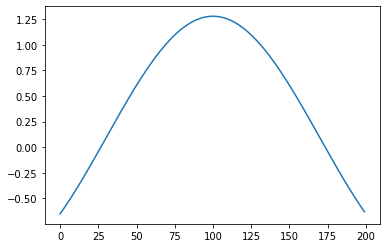

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


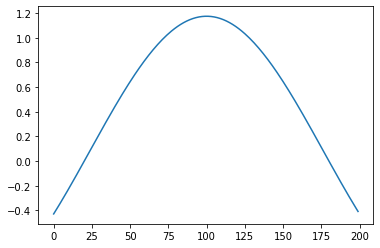

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


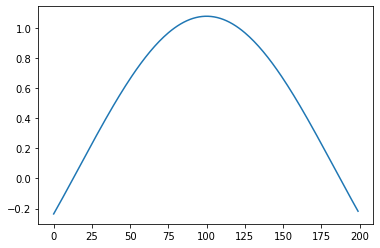

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


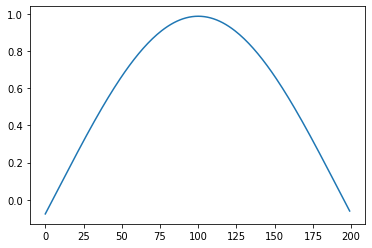

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


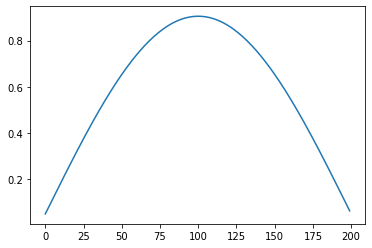

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


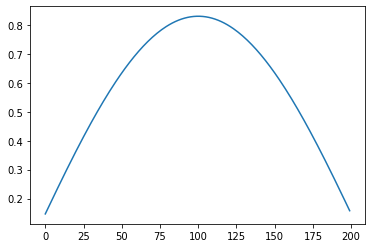

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


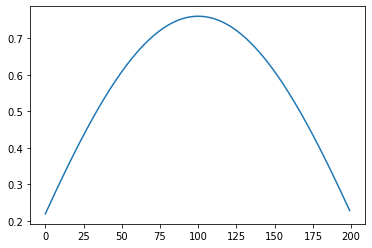

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


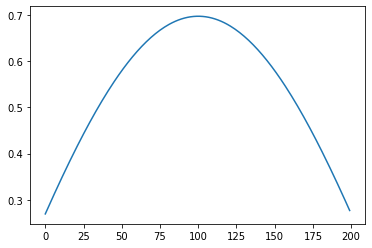

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


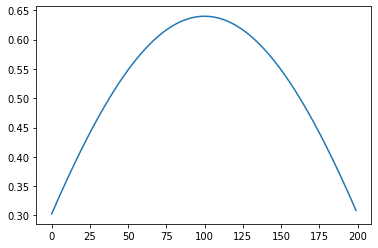

In [0]:
t = np.arange(-10,10,.1)
T = len(t)
mor = np.zeros(T)
w=2*np.pi*2.5/2.5

for i in scale1(5,8):
    for x in range(T):
        #wavelet filters for the various scales of lambda(1) 
        mor[x] = (np.pi**-0.25 * (np.exp(1j*w*(t[x]/i)) - np.exp(-0.5*(w**2))) * np.exp(-0.5*((t[x]/i)**2)))/i                      
    plt.plot(mor.real)
    plt.show()

## Importing the data 

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ambient_temperature_system_failure.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['ambient_temperature_system_failure.csv']))
df

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


## Summary of the data

In [0]:
df.describe()


,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


## Plot of the original data

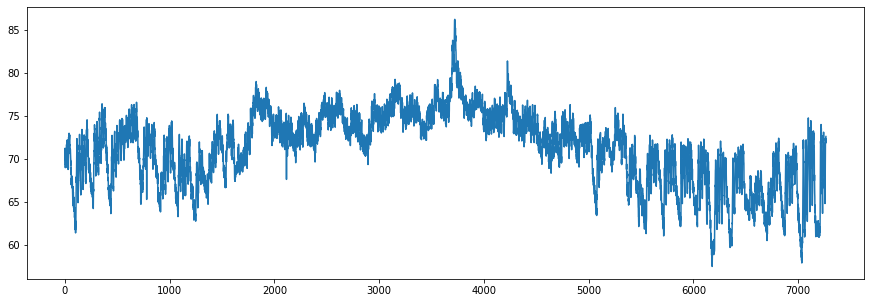

In [0]:
f, axs = plt.subplots(figsize=(15,5))
plt.plot(df["value"])
plt.show()

### Since the data ranges from 57 to 86, we create new anomalies that are below the minimum and above the maximum. 

## Adding anomalies to the data

In [0]:
df1.loc[1000] = 55
df1.loc[3350] = 95
df1.loc[5640] = 90


## Plot of the anomalies

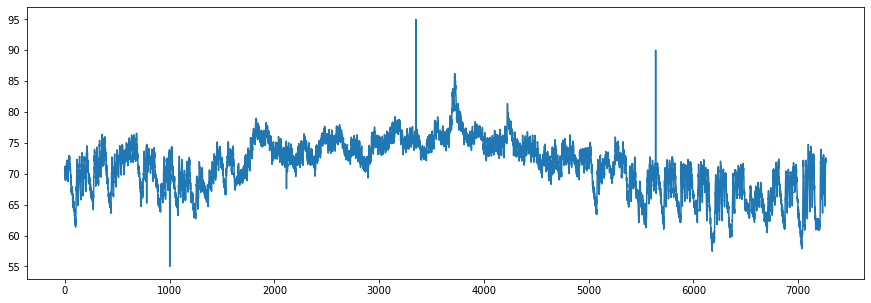

In [0]:
f, axs = plt.subplots(figsize=(15,5))
plt.plot(df1["value"])
plt.show()

###  First scattering coefficients $U_1(x,\lambda_1) = | x * \psi_{\lambda_1} | * \phi $

In [0]:
# defining set of scales for lambda1
def scale1(J1,Q1):
    lambda1 = np.zeros(J1*Q1) #initialising 
    for j in range(J1*Q1):
        lambda1[j] += 2**(1+(j/Q1)) #set of scales for lambda1
    return(lambda1)


u = np.arange(-3,3,.1)
s=1
t = np.arange(-10,10,1)
T = len(t)
mor = np.zeros(T)
w=2*np.pi*2/2.5

def U1(J1,Q1):
    U111 = []
    for i in scale1(J1,Q1):
        for x in range(T):
            #wavelet filter for the various scales of lambda(1) 
            mor[x] = (np.pi**-0.25 * (np.exp(1j*w*(t[x]/i)) - np.exp(-0.5*(w**2))) * np.exp(-0.5*((t[x]/i)**2))/i)
            #convolution
        U1 = abs(signal.convolve(df1["value"],mor))
        norm = np.exp(-.5*(u/s)**2) / (np.sqrt(2*np.pi*s**2))
        U11 = signal.convolve(U1,norm)
        U111.append(U11) 
    return(U111)                                                                                                                                                                                                                                                      

In [0]:
U1(5,8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


[array([4.33454064e-07, 3.91052521e-06, 1.38990498e-05, ...,
        1.45764628e-04, 1.86102475e-05, 5.25960949e-06]),
 array([1.43077040e-06, 1.01475358e-05, 1.22326843e-04, ...,
        8.54897223e-04, 1.66536842e-04, 9.44141845e-06]),
 array([9.28329710e-06, 7.79395332e-05, 1.61612061e-04, ...,
        1.43877193e-03, 2.08623335e-04, 1.04536567e-04]),
 array([4.57748629e-05, 1.43533464e-04, 8.64163702e-04, ...,
        2.20105460e-03, 1.06968259e-03, 4.93857038e-05]),
 array([7.51090835e-05, 5.23715327e-04, 1.25531566e-03, ...,
        6.82570285e-03, 1.78388862e-03, 6.96681031e-04]),
 array([0.00032733, 0.00131304, 0.00320179, ..., 0.01031471, 0.0035015 ,
        0.00075307]),
 array([0.00060136, 0.00141866, 0.00587979, ..., 0.01212302, 0.00863034,
        0.00170737]),
 array([0.0006479 , 0.00457156, 0.0096934 , ..., 0.02282793, 0.0095723 ,
        0.00424248]),
 array([0.00255519, 0.00746588, 0.0123004 , ..., 0.03368534, 0.00956175,
        0.00199464]),
 array([0.0019403 , 0.004

## Plot of the first scattering coefficients

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


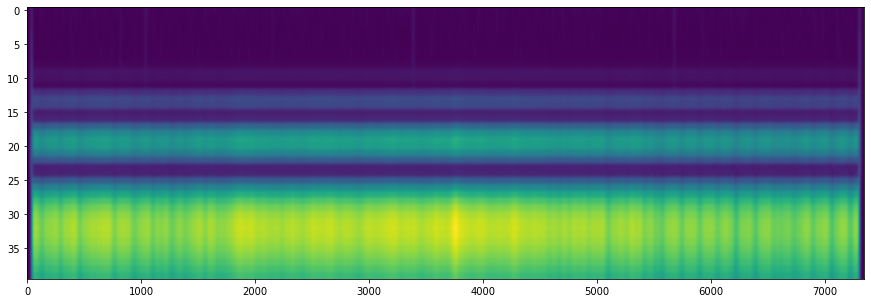

In [0]:
f, axs = plt.subplots(figsize=(15,5))
plt.imshow(U1(5,8),aspect='auto')
plt.show()

###  Second scattering coefficients $U_2(x,\lambda_1,\lambda_2) = || x * \psi_{\lambda_1}| * \psi_{\lambda_2}| * \phi, $


In [0]:
# defining set of scales for lambda1
def scale1(J1,Q1):
    lambda1 = np.zeros(J1*Q1) #initialising 
    for j in range(J1*Q1):
        lambda1[j] += 2**(1+(j/Q1)) #set of scales for lambda1
    return(lambda1)


# defining set of scales for lambda2
def scale2(J2,Q2):
    lambda2 = np.zeros(J2*Q2) #initialising 
    for j in range(J2*Q2):
        lambda2[j] += 2**(1+(j/Q2)) #set of scales for lambda2
    return(lambda2)

v = np.arange(-3,3,.1) # range of the gaussian low pass filter
s=1 # variance
u = np.arange(-10,10,1) # range of the scales for lambda1
t = np.arange(-10,10,1) # range of the scales for lambda2
T = len(t)
mor1 = np.zeros(T) #dilated wavelet filters for lambda(1) 
mor2 = np.zeros(T) #dilated wavelet filters for lambda(1) 
w=2*np.pi*2.5/2.5 

def U2(J1,Q1,J2,Q2):
    U222 = []
    for j in scale2(J2,Q2):
        for i in scale1(J1,Q1):
            for x in range(T):
                #wavelet filter for the various scales of lambda(1) 
                mor1[x] = (np.pi**-0.25 * (np.exp(1j*w*(t[x]/i)) - np.exp(-0.5*(w**2))) * np.exp(-0.5*((t[x]/i)**2)))/i
                mor2[x] = (np.pi**-0.25 * (np.exp(1j*w*(u[x]/j)) - np.exp(-0.5*(w**2))) * np.exp(-0.5*((u[x]/j)**2)))/j
                #convolution
            U1 = abs(signal.convolve(df1["value"],mor1))                 
            U2 = abs(signal.convolve(U1,mor2))
            norm = np.exp(-.5*(v/s)**2) / (np.sqrt(2*np.pi*s**2))
            U22 = signal.convolve(U2,norm)
                #plt.plot(U1.real)
                #plt.show()
            U222.append(U22)    
    return(U222)   

In [0]:
A(5,8,4,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


[array([3.03330451e-08, 1.45647258e-07, 4.26891565e-07, ...,
        7.38895637e-07, 2.69559025e-07, 5.98245428e-08]),
 array([1.74924344e-07, 8.69546700e-07, 2.64366020e-06, ...,
        5.27548149e-06, 1.84070678e-06, 3.92908099e-07]),
 array([2.79967722e-07, 1.62146711e-06, 5.58559141e-06, ...,
        1.56708943e-05, 5.07516386e-06, 1.00037383e-06]),
 array([2.28581029e-06, 9.94643550e-06, 2.63345967e-05, ...,
        2.59801028e-05, 1.11515050e-05, 2.84405555e-06]),
 array([1.08349293e-05, 5.13923587e-05, 1.49723570e-04, ...,
        2.55321411e-04, 9.19885647e-05, 2.03461822e-05]),
 array([1.36667049e-06, 1.25594662e-05, 5.38677929e-05, ...,
        2.14475327e-04, 6.65570838e-05, 1.23933515e-05]),
 array([5.74413464e-05, 2.65388753e-04, 7.54265949e-04, ...,
        1.15480031e-03, 4.25691989e-04, 9.64363454e-05]),
 array([1.60368367e-05, 9.40526707e-05, 3.24531136e-04, ...,
        9.11460881e-04, 2.97809438e-04, 5.91998608e-05]),
 array([0.00017881, 0.00082844, 0.00236367, ...,

## Plot of the second scattering coefficients

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


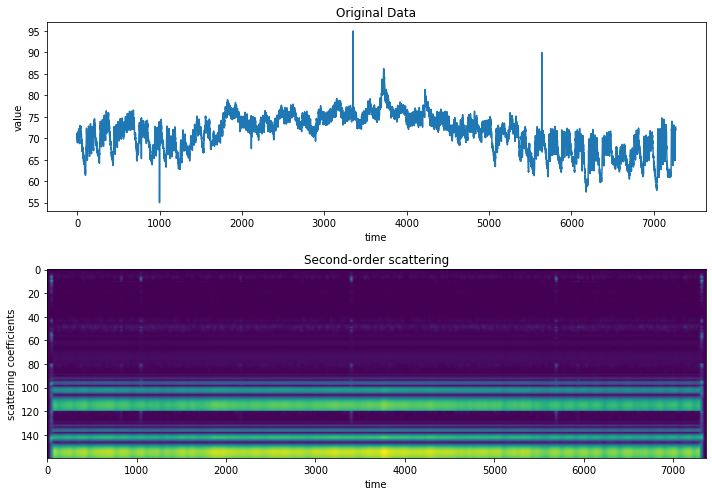

In [0]:
f, axs = plt.subplots(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(df1["value"])
plt.xlabel("time")
plt.ylabel("value")
plt.title('Original Data')

plt.subplot(2,1,2)
plt.imshow(U2(5,8,4,1),aspect='auto')
plt.xlabel("time")
plt.ylabel("scattering coefficients")
plt.title('Second-order scattering')
plt.tight_layout() # space it nicely
plt.show()

## Non-linear thresholding


In [0]:
 ## m is the median of the second scattering coefficients
T = U2(5,8,4,1) #scattering coefficients 
b= np.sort(T)
m = (b[len(b)//2] + b[len(b)//2 -1])/2 


for i in range(len(T)): 
  for j in range(len(T[0])):
    if T[i][j]<= m[j]:
        T[i][j] = 0
    else:
      T[i][j] = T[i][j] - m[j]

T


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 0.00000000e+00, 4.56605916e-50, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 6.30288591e-50, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 4.16312235e-52, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 2.68454847e-50, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 4.20520226e-52, 6.43340124e-50, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([1.09282892e-51, 9.93299180e-51, 1.03616895e-49, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([5.46496524e-52, 9.67839420e-51, 1.00698659e-49, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 1.32471380e-51, 7.45543586

## Plot of the thresholding result

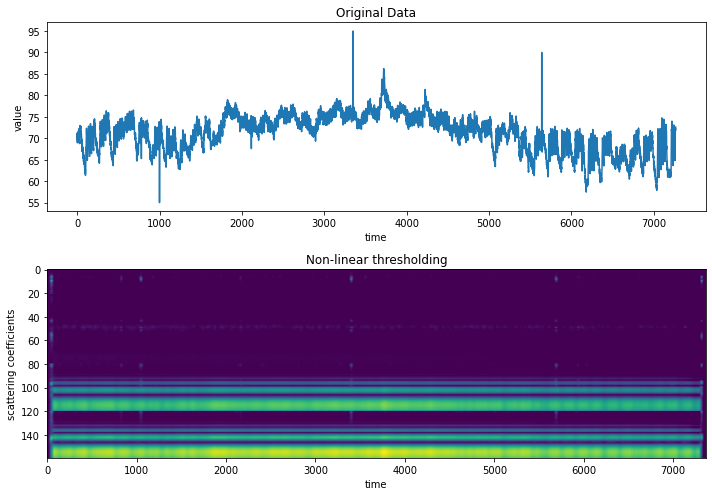

In [0]:
f, axs = plt.subplots(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(df1["value"])
plt.xlabel("time")
plt.ylabel("value")
plt.title('Original Data')

plt.subplot(2,1,2)
plt.imshow(T,aspect='auto')
plt.xlabel("time")
plt.ylabel("scattering coefficients")
plt.title('Non-linear thresholding')
plt.tight_layout() # space it nicely
plt.show()


## Performing PCA over all lambda 1 for each lambda 2

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer

## Transforming the data to a dataframe 

In [0]:
a = pd.DataFrame(T[0:40])
a1 = a.T

b = pd.DataFrame(T[40:80])
b1 = b.T

c = pd.DataFrame(T[80:120])
c1 = c.T

d = pd.DataFrame(T[120:160])
d1 = d.T


### Performing PCA

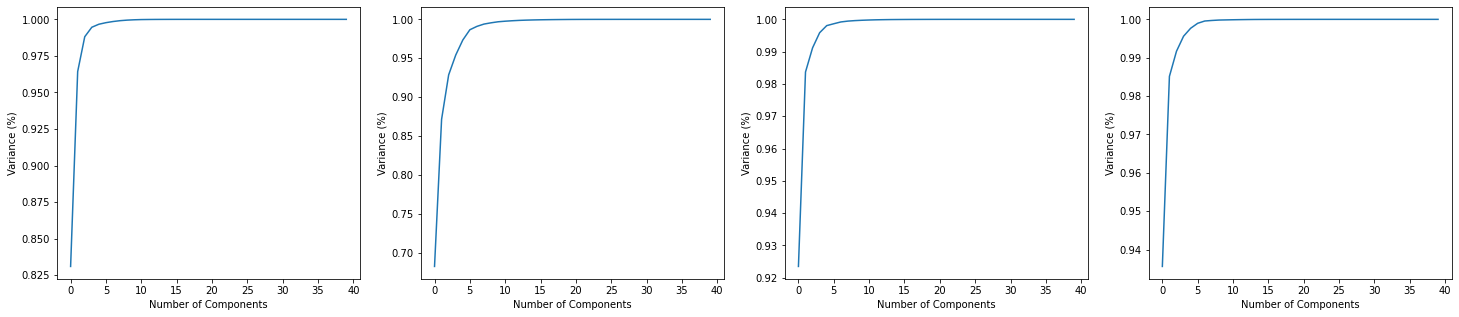

In [0]:
#Fitting the PCA algorithm with our Data
pcaa = PCA().fit(a1) 
pcab = PCA().fit(b1) 
pcac = PCA().fit(c1)
pcad = PCA().fit(d1)



#Plotting the Cumulative Summation of the Explained Variance
f, axs = plt.subplots(2,2,figsize=(25,5))

plt.subplot(1,4,1)
plt.plot(np.cumsum(pcaa.explained_variance_ratio_))#np.cumsum
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component 

plt.subplot(1,4,2)
plt.plot(np.cumsum(pcab.explained_variance_ratio_))#np.cumsum
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component 


plt.subplot(1,4,3)
plt.plot(np.cumsum(pcac.explained_variance_ratio_))#np.cumsum
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.subplot(1,4,4)
plt.plot(np.cumsum(pcad.explained_variance_ratio_))#np.cumsum
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component


plt.show()

## The first two principal components explained most of the variations in the data, i.e, 0.831 and 0.133

In [0]:
#proportion of variation explained by each principal component 
pcaa.explained_variance_ratio_ 



array([8.31048799e-01, 1.33273290e-01, 2.37967010e-02, 6.48987265e-03,
       2.05711088e-03, 1.07040501e-03, 7.80762848e-04, 5.80442460e-04,
       3.75765791e-04, 2.30807700e-04, 1.46669534e-04, 5.73951520e-05,
       4.13531165e-05, 2.09714531e-05, 1.26250995e-05, 7.58419020e-06,
       3.80626257e-06, 3.39568050e-06, 1.02406551e-06, 6.53153030e-07,
       2.54730492e-07, 1.73767315e-07, 5.39374007e-08, 2.59285870e-08,
       2.12453429e-08, 1.38645447e-08, 9.08847487e-09, 5.26065124e-09,
       3.33338574e-09, 1.98505890e-09, 1.74841362e-09, 4.13519099e-10,
       1.73842808e-10, 3.51855017e-11, 6.87029378e-12, 1.90512719e-12,
       3.56683754e-14, 5.92142252e-24, 7.68119215e-33, 2.60085739e-37])

## The first three principal components explained most of the variations in the data, i.e, 0.682, 0.189 and 0.057

In [0]:
#proportion of variation explained by each principal component 
pcab.explained_variance_ratio_ 



array([6.82464515e-01, 1.89094521e-01, 5.70970926e-02, 2.54509625e-02,
       1.93286498e-02, 1.32133176e-02, 4.32920063e-03, 2.96675764e-03,
       1.61638132e-03, 1.33118618e-03, 7.40090036e-04, 5.82739406e-04,
       4.66887273e-04, 3.25864846e-04, 2.46671070e-04, 1.86070061e-04,
       1.33876048e-04, 1.20219159e-04, 8.69276122e-05, 7.43394955e-05,
       4.74820697e-05, 2.85037954e-05, 1.76030007e-05, 1.18360801e-05,
       1.14429103e-05, 8.05627802e-06, 6.35827504e-06, 4.52052083e-06,
       2.28478115e-06, 1.77113485e-06, 1.24045737e-06, 9.30422781e-07,
       8.42689235e-07, 4.65428519e-07, 1.66640549e-07, 1.01129313e-07,
       7.36332013e-08, 3.29477087e-08, 1.01613250e-08, 7.98429363e-09])

## The first principal component explained most of the variations in the data, i.e, 0.92

In [0]:
#proportion of variation explained by each principal component 
pcac.explained_variance_ratio_ 


array([9.23512139e-01, 6.01943895e-02, 7.47446231e-03, 4.68253715e-03,
       2.19502699e-03, 5.82894803e-04, 5.54623526e-04, 2.63207035e-04,
       1.52755603e-04, 1.06367340e-04, 8.10867906e-05, 6.12362117e-05,
       3.94696220e-05, 3.18331786e-05, 1.74867606e-05, 1.32141440e-05,
       1.12467405e-05, 6.85533404e-06, 6.18040748e-06, 4.47119807e-06,
       2.94769550e-06, 2.50807444e-06, 1.40395733e-06, 6.39348124e-07,
       5.58721898e-07, 1.25693645e-07, 8.88437500e-08, 7.80663713e-08,
       5.81425258e-08, 4.71866812e-08, 3.77291719e-08, 1.20462503e-08,
       5.92010118e-09, 3.55485293e-09, 9.39301161e-10, 7.13774778e-11,
       6.40885883e-11, 1.27113939e-12, 8.25993711e-15, 1.11831636e-15])

## The first two principal components explained most of the variations in the data, i.e, 0.93

In [0]:
#proportion of variation explained by each principal component 
pcad.explained_variance_ratio_ 

array([9.35609952e-01, 4.95324700e-02, 6.54336745e-03, 3.91526886e-03,
       2.07296245e-03, 1.30048276e-03, 5.93900659e-04, 1.41828592e-04,
       1.06267643e-04, 4.09930040e-05, 3.78084976e-05, 2.90838117e-05,
       2.42073736e-05, 1.93663783e-05, 9.63494167e-06, 6.23047898e-06,
       3.19336226e-06, 2.93055016e-06, 2.81625025e-06, 1.77075775e-06,
       1.43704242e-06, 1.08863125e-06, 9.13406263e-07, 5.29449025e-07,
       4.21756149e-07, 3.52707322e-07, 2.30652588e-07, 1.60172596e-07,
       1.16785304e-07, 8.31153671e-08, 5.37047383e-08, 3.90708331e-08,
       1.81968514e-08, 1.05386784e-08, 6.51371032e-09, 2.31786688e-09,
       4.64771502e-11, 1.12737393e-11, 6.79236760e-13, 1.05759822e-15])

## Transforming the data to the principal components

In [0]:
pcaa = PCA(n_components=2) # creating a PCA with 2 components
newa= pcaa.fit_transform(a1) # applying the components on the dataset
newa

array([[-0.33732474, -0.05643108],
       [-0.33732476, -0.05643107],
       [-0.33732476, -0.05643107],
       ...,
       [-0.33732476, -0.05643107],
       [-0.33732476, -0.05643107],
       [-0.33732476, -0.05643107]])

In [0]:
pcab = PCA(n_components=3) # creating a PCA with 3 components
newb= pcab.fit_transform(b1) # applying the components on the dataset
newb

array([[-0.23623941, -0.86692094,  0.37639548],
       [-0.23576126, -0.8669102 ,  0.37629688],
       [-0.23518634, -0.86688885,  0.37623376],
       ...,
       [-0.23645133, -0.86693145,  0.37643984],
       [-0.23645133, -0.86693145,  0.37643984],
       [-0.23645133, -0.86693145,  0.37643984]])

In [0]:
pcac = PCA(n_components=1) # creating a PCA with 1 component
newc= pcac.fit_transform(c1) # applying the components on the dataset
newc

array([[54.86562394],
       [54.86511556],
       [54.8630465 ],
       ...,
       [54.86562394],
       [54.86562394],
       [54.86562394]])

In [0]:
pcad = PCA(n_components=1) # creating a PCA with 1 component
newd= pcad.fit_transform(d1) # applying the components on the dataset
newd

array([[67.70022627],
       [67.69863695],
       [67.69479671],
       ...,
       [67.70066102],
       [67.70066102],
       [67.70066102]])

In [0]:
Lx1 = []
Lx1.append(newa.T[0])
Lx1.append(newa.T[1])
Lx1.append(newb.T[0])
Lx1.append(newb.T[1])
Lx1.append(newb.T[2])
Lx1.append(newc.T[0])
#Lx1.append(newc.T[1])
#Lx1.append(newc.T[2])
Lx1.append(newd.T[0])
#Lx1.append(newd.T[1])
#Lx1.append(newd.T[2])

Lx1

[array([-0.33732474, -0.33732476, -0.33732476, ..., -0.33732476,
        -0.33732476, -0.33732476]),
 array([-0.05643108, -0.05643107, -0.05643107, ..., -0.05643107,
        -0.05643107, -0.05643107]),
 array([-0.23623941, -0.23576126, -0.23518634, ..., -0.23645133,
        -0.23645133, -0.23645133]),
 array([-0.86692094, -0.8669102 , -0.86688885, ..., -0.86693145,
        -0.86693145, -0.86693145]),
 array([0.37639548, 0.37629688, 0.37623376, ..., 0.37643984, 0.37643984,
        0.37643984]),
 array([54.86562394, 54.86511556, 54.8630465 , ..., 54.86562394,
        54.86562394, 54.86562394]),
 array([67.70022627, 67.69863695, 67.69479671, ..., 67.70066102,
        67.70066102, 67.70066102])]

## Plot of PCA

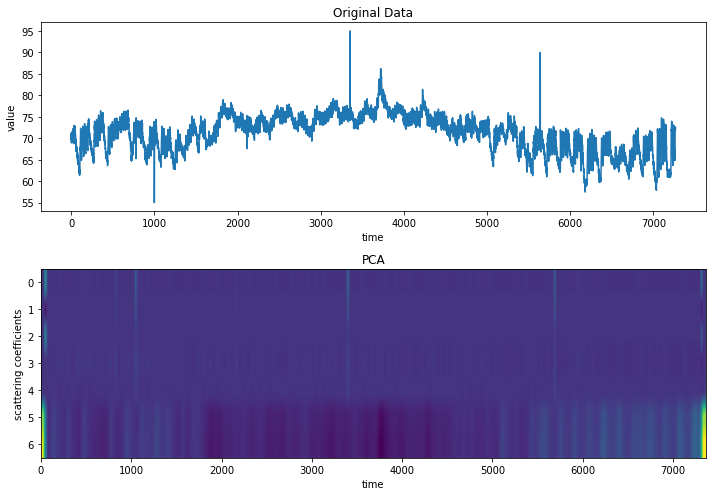

In [0]:
f, axs = plt.subplots(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(df1["value"])
plt.xlabel("time")
plt.ylabel("value")
plt.title('Original Data')

plt.subplot(2,1,2)
plt.imshow(Lx1,aspect='auto')
plt.xlabel("time")
plt.ylabel("scattering coefficients")
plt.title('PCA')
plt.tight_layout() # space it nicely
plt.show()


## Max pooling

In [0]:
# max for lambda1 scales
a = T[39] 
b = T[79]
c = T[119]
d = T[159]

#Combining them into one list
max1 = []
max1.append(a)
max1.append(b)
max1.append(c)
max1.append(d)
max1

[array([2.62219755e-09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([1.54581140e-05, 4.72225033e-05, 5.40490341e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([1.53119375e-13, 5.83257684e-05, 3.13995796e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([5.11597759e-05, 2.43525448e-04, 7.24411371e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])]

## Plot of max pooling


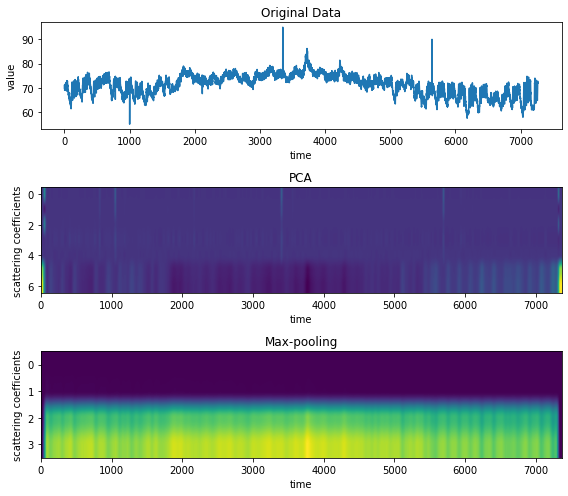

In [0]:
f, axs = plt.subplots(figsize=(8,7))

plt.subplot(3,1,1)
plt.plot(df1["value"])
plt.xlabel("time")
plt.ylabel("value")
plt.title('Original Data')

plt.subplot(3,1,2)
plt.imshow(Lx1,aspect='auto')
plt.xlabel("time")
plt.ylabel("scattering coefficients")
plt.title('PCA')

plt.subplot(3,1,3)
plt.imshow(max1,aspect='auto')
plt.xlabel("time")
plt.ylabel("scattering coefficients")
plt.title('Max-pooling')
plt.tight_layout() # space it nicely
plt.show()
